##Neural Networks - Forward Pass and Backpropagation

In this lesson, we're going to do intuitive work on forward pass, back-propagation, loss functions and auto-gradient descent.  We will focus on training in the next lesson.

Forward pass, back-propagation, loss functions and auto-gradient descent are key to understand training neural networks... In Andrej Karpathy's own words - "all the rest is just efficiencies".

We are going to develop this lesson in Python code.  Lets start with importing in the libraries we need - the core ones are the math, numpy and matplotlib libraries.

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Function of a single variable

Lets start with an arbitrary scalar valued function $f(x)$.  It takes $x$ and returns $y$

$$
y = f(x) = 3x^2 - 4x + 5
$$

This function in Python, is written as follows:

In [16]:

# arbitrary scalar value function - takes x and returns y
def f(x):
  return 3*x**2 - 4*x + 5

So for e.g., if $x = 3$

In [17]:
f(3.0)

20.0

Lets plot this function and see what it looks like.  We use a range  values for $x$ from -5 through 5 with a step of 0.25

In [18]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
xs # this just prints the value of xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [19]:
ys # this just prints the value of ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

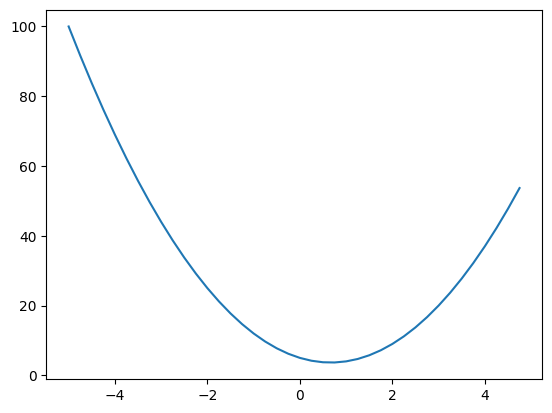

In [20]:
plt.plot(xs, ys)

Next we want figure out what the derivative of this equation looks like.  The Wikipedia definition of a [deriviative](https://en.wikipedia.org/wiki/Derivative) is as follows:

Given a function $$f(x)$$ its derivative is written as

$$
\lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

The slope is referred to as the **Gradient**. (_Note: there is a precise defintion that might differ from slope - but they are close enough_)

_So if we bump up x at a particular point in the function by a very small value h, how does that function respond, i.e. by what sensitivitiy, basically the slope of the response at that point, how much does the function go up or down_

In [21]:
h = 0.000000001
x = 3.0 # we expect a positive slope at x=3
(f(x+h) - f(x))/h

14.000001158365194

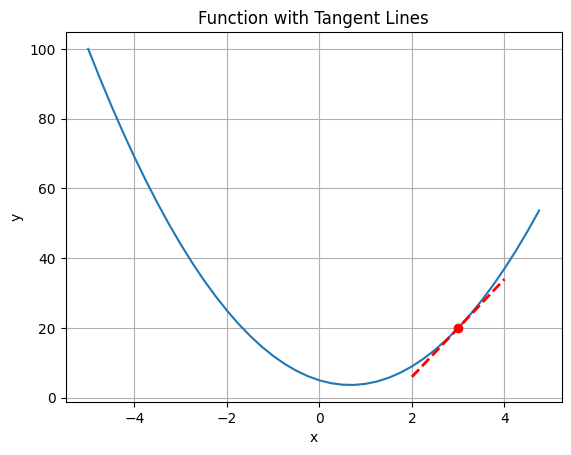

In [22]:

plt.plot(xs, f(xs))

# Function to plot tangent line
def plot_tangent(x0, y0, slope, color='r'):
    x_tangent = np.array([x0 - 1, x0 + 1])
    y_tangent = slope * (x_tangent - x0) + y0
    plt.plot(x_tangent, y_tangent, color, linestyle='--', linewidth=2)

# show the tangent lines at x = 3.0
y = f(x)  # f is our original function
slope = (f(x+h) - f(x))/h
plot_tangent(x, y, slope)
plt.plot(x, y, 'ro')  # Add a red dot at the tangent point

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Tangent Lines')
plt.grid(True)
plt.show()

So at x = 3, the slope is 14 (you can get the same answer by manually plugging in x into the equation).  This means that the function responds postitively (i.e. going up to the right) 

In [23]:
x = -3.0 # we expect a negative slope at x=-3
(f(x+h) - f(x))/h

-22.000001820288162

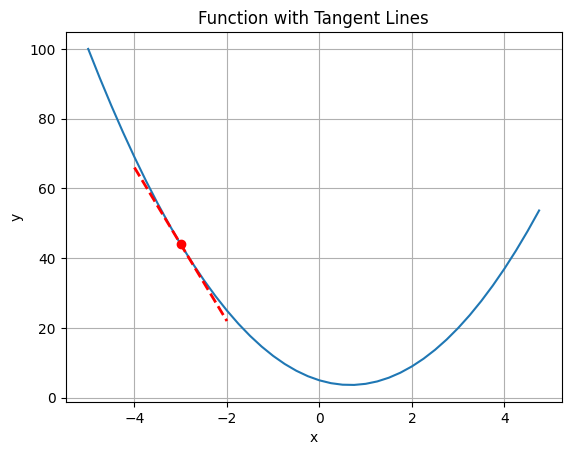

In [24]:
plt.plot(xs, f(xs))

# show the tangent lines at x = -3.0
y = f(x)  # f is our original function
slope = (f(x+h) - f(x))/h
plot_tangent(x, y, slope)
plt.plot(x, y, 'ro')  # Add a red dot at the tangent point

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Tangent Lines')
plt.grid(True)
plt.show()

So at x = -3, the slope is 22 (again, you can get the same answer by manually plugging in x into the equation).  This means that the function responds negatively (i.e. going downward) 

In [25]:
x = 0.667 # we expect a zero slope at x=0.6666
(f(x+h) - f(x))/h

0.002000177801164682

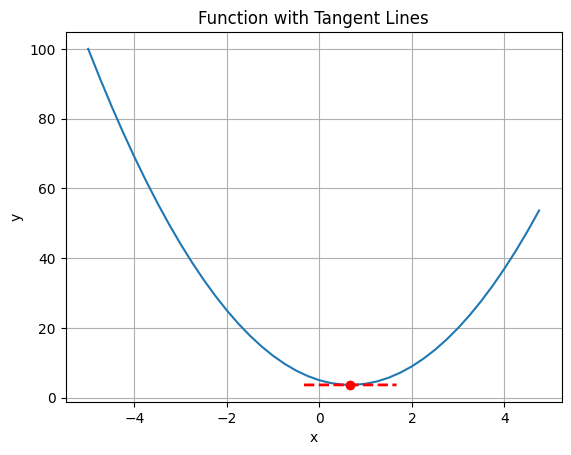

In [26]:
plt.plot(xs, f(xs))

# show the tangent lines at x = 3.0
y = f(x)  # f is our original function
slope = (f(x+h) - f(x))/h
plot_tangent(x, y, slope)
plt.plot(x, y, 'ro')  # Add a red dot at the tangent point

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Tangent Lines')
plt.grid(True)
plt.show()

At a specific point (x = 2/3) the slope is zero (i.e. there is minimal or zero response or change to incrementing x by a small amount h)

#### Function of multiple variables

Lets now use a function that has multiple variables and see how the gradient is affected by each of those variables

In [27]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


Lets figure out derivative of d w.r.t. each of a, b and c

In [28]:
# small amount to vary each variable a, b, c by
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h # bump up a by h (a very small value)
d2 = a*b + c

print('d1', d1)
print('d2', d2) # since a will become slightly more positive but is multipled by b which 
                # is negative we expect d2 to be slightly smaller
print('slope', (d2-d1)/h) # gradient

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


So the gradient of d with respect to a (i.e. $dd/da$) has a negative slope.  So a small change in a changes d in a downward direction.

Lets see how a small change
 in b affects the gradient.

In [29]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h # bump up b by h (a very small value)
d2 = a*b + c

print('d1', d1)
print('d2', d2) # since b will become slightly less negative but is multipled by a which is 
                # postive we expect d2 to be slightly larger
print('slope', (d2-d1)/h) # gradient

d1 4.0
d2 4.0002
slope 2.0000000000042206


So the gradient of d with respect to b (i.e. $dd/db$) has a positive slope.  So a small change in a changes d in a upward direction.

Lets see how a small change in c affects the gradient.

In [30]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h # bump up c by h (a very small value)
d2 = a*b + c

print('d1', d1)
print('d2', d2) # since bc will become slightly larger, we expect d2 to be larger
print('slope', (d2-d1)/h) # gradient

d1 4.0
d2 4.0001
slope 0.9999999999976694


So the gradient of d with respect to b (i.e. $dd/dc$) has a positive slope.  So a small change in a changes d in a upward direction.

### Forward Pass and Back-Propagation

Continuing on, lets spell-out the details of how to do a forward pass and back-propagation on this multi-variable equation.

Remember from our [Introduction to Neural Networks](/nn-intro.ipynb) lesson that the basic mathematical expression for a Neuron in a neural network is

$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + \dots + b
$$

We will get to this specific equation in the next lesson on [Training Neural Networks](/nn-training.ipynb), but for now simply note that the equation above is sort of similar to our current equation

$$
d = a b + c
$$

with a single variable b (x) and a single weight a (w) and with a bias c (b)

Lets now go step-by-step as to how to figure out a Gradient for the output d with respect to each of the variables, taking into account the fact that we first multiple two of them and then add.

So we need to build an intuition for how we calculate the gradient through the multiplication and addition operations.

In order to do that, lets create each of these as a Value object and implment the multiplication, addition.

We also want to add somthing that representsan activation function to apply to the function output d to mimic the activation.

So essentially we want to represent the overall equation

$$
activation(d = a b + c)
$$

so we will actually use the equation

$$
L = f*(a*b + c)
$$

Here f sort of represents an activation function (which in the real Neurron will be a number from -1 to 1.  This is because the activation function we choose will be the Hyperbolic Tangent (tanh) function).  For now we are just multiplying f with the output of $ab + c$

So lets define a class Value as follows:

In [42]:
class Value:

  # Initialized with the value (data)
  # We also keep track of the children (i.e. which other Values created this one)
  # So for e.g. 3 + 2 = 5.  This current Value is 5 and its children are 3 and 2
  # We also keep track of the operation (plus, multiply, tanh)
  # We also create a label for this Value
  # We also have a self.grad = this maintains the gradient of the *final output* 
  # w.r.t. the current Value object (so dL/df for e.g.)
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # default gradient is zero
    self._prev = set(_children) # empty set (set for efficiency)
    self._op = _op
    self.label = label

  # This function is what is printed out to console for this Value object
  def __repr__(self):
    return f"Value(data={self.data}, grad={self.grad})"

  # Add this (self) with other and return a new Value
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')

  # Add this (self) with other and return a new Value
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

  # Activation function (Hyperbolic Tangent - returns value between -1 and 1)
  def tanh(self):
    n = self.data
    t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1) # this is simply how tanh is defined (see Wikipedia)
    out =  Value(t, (self,), label='tanh')
    return out

#### Forward Pass

Forward-pass then is just plugging in values into the equation to get the value (in this case of the activation function)

In [64]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b
e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f # L is the output of our graph
L.label='L'
L # Note: forward-pass builds out value of L and we print it out here

Value(data=-8.0, grad=0.0)

The code below can be treated as black-box code for now... in that you don't need to figure out what it does.  Just know that it pretty much prints out the equation we are working with, i.e., 

$$
L = f*(a*b + c)
$$

It uses a Python library called **graphviz** that prints out a pretty graph (called a Directed Acyclic Graph) of the equation

In [43]:
# black-box code that draws a DAG for Value objects using graphviz Digraph
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

Lets use the draw_dot function now to draw out our equation (represented by the Value 'L').

Note that we have created intermediate Value objects. So for e.g.

$$
e = a*b
$$

and so

$$
d = e + c
$$

which then yields

$$
L = f*(d)
$$

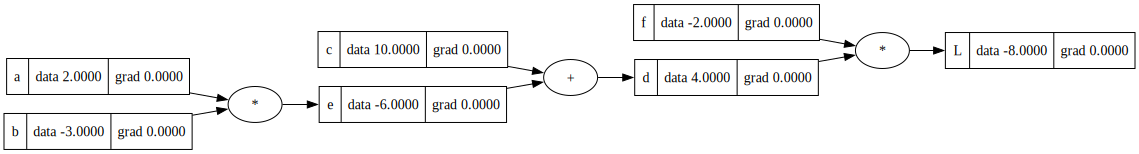

In [44]:
draw_dot(L)

Notice all the gradients are zero.

#### Back-Propagation

We now calculate the gradients for L w.r.t. each of its priors starting with L itself. Since we are calculating the gradients starting with L going backward, this process is called back-propagation

Lets now, step-by-step calculate gradients (or derivatives) of L w.r.t. each of its priors, including itself (L, f, d, e, c, b, a):

First we calculate gradient for L (w.r.t. L or itself) - i.e. if L is tweaked by a tiny amount h - how much does L change? ($dL/dL$ which we expect to be 1)

Lets use the code below to verify.

In [58]:
h = 0.0001
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L2 = L.data + h

print("gradient for L with respect to L (itself) =", (L2 - L1)/h)

gradient for L with respect to L (itself) = 0.9999999999976694


Now we calculate gradient for L (w.r.t. d) - i.e. if d is tweaked by a tiny amount h - how much does L change? ($dL/dd$)

$L = d*f$

$dL/dd = ?$

$derivative = \frac{f(x+h) - f(x)}{h}$

$dL/dd = ((d+h)*f - d*f)/h = (d*f + h*f -d*f)/h = (h*f)/h = f$

Therefore

$dL/dd  = f = -2.0$

Similarily

$dL/df = d = 4.0$

We can verify by incrementing d or f by h and calculating gradient

In [51]:
h = 0.0001
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
print ("value of f = ", f.data)
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = (e + c); d.label='d'
d2 = Value(d.data + h, 'd2')
f = Value(-2.0, label='f')
L = d2*f; L.label='L'
L2 = L.data

print("gradient for L with respect to d =", (L2 - L1)/h)

value of f =  -2.0
gradient for L with respect to d = -1.9999999999953388


In [53]:
h = 0.0001
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
print ("value of d = ", d.data)
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = (e + c); d.label='d'
f2 = Value(-2.0 + h, label='f2')
L = d*f2; L.label='L'
L2 = L.data

print("gradient for L with respect to f =", (L2 - L1)/h)

value of d =  4.0
gradient for L with respect to f = 3.9999999999995595


Now we come to the MOST IMPORTANT piece of backpropogation and neural nets below

The gradient for L w.r.t. c or e

L is sensitive to d which in turn is sensitive to c and e

We already know $dl/dd$

So what is $dd/dc$

$d = c + e$

$derivative = \frac{f(x+h) - f(x)}{h}$

$dd/dc = (((c + h) + e) - (c + e))/h = (c + h + e - c - e)/h = h/h = 1$

similarily by symmetery 

$dd/de = 1.0$

Now using [chain rule](https://en.wikipedia.org/wiki/Chain_rule)

if a variable "z" depends on variable "y" which in turn depends on variable "x"

i.e. y and z are dependent variables, then "z" depends on x as well

the chain rule is expressed as 

$$dz/dx = dz/dy * dy/dx$$

Therefore 

$$dL/dc = dL/dd * dd/dc = -2.0 * 1.0 = -2.0$$

and by symmetry 

$$dL/de = dL/dd * dd/de = -2.0 * 1.0 = -2.0$$

So in the case of our "+" - we observe that it simply routes the grad of the next layer backward

In this case, it routes the grad of "d" back to "c" and "d" - as d is dependent on each of them

Lets verify using our code

In [54]:
h = 0.0001
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
print ("value of d = ", d.data)
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
c2 = Value(c.data + h)
e = a*b; e.label='e'
d = (e + c2); d.label='d'
L = d*f; L.label='L'
L2 = L.data

print("gradient for L with respect to c =", (L2 - L1)/h)

value of d =  4.0
gradient for L with respect to c = -1.9999999999953388


In [55]:
h = 0.0001
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
print ("value of d = ", d.data)
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
e2 = Value(e.data + h)
d = (e2 + c); d.label='d'
L = d*f; L.label='L'
L2 = L.data

print("gradient for L with respect to e =", (L2 - L1)/h)

value of d =  4.0
gradient for L with respect to e = -1.9999999999953388


Now finally lets figure out $dL/da$ and $dL/db$

$$dL/da = dL/de * de/da$$

note that 
$$e = a*b$$ 
therefore 

$$de/da = b = -3.0$$

therefore 

$$dL/da = -2.0 * -3.0 = 6.0$$

similarily 

$$dL/db = dL/de * de/db = -2.0 * 2.0 = -4.0$$

In [56]:
h = 0.0001
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
print ("value of d = ", d.data)
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
b2 = Value(b.data + h)
c = Value(10.0, label='c')
e = a*b2; e.label='e'
d = (e + c); d.label='d'
L = d*f; L.label='L'
L2 = L.data

print("gradient for L with respect to b =", (L2 - L1)/h)

value of d =  4.0
gradient for L with respect to b = -4.000000000008441


In [57]:
h = 0.0001
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
print ("value of d = ", d.data)
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L1 = L.data

a = Value(2.0, label='a')
a2 = Value(a.data + h)
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a2*b; e.label='e'
d = (e + c); d.label='d'
L = d*f; L.label='L'
L2 = L.data

print("gradient for L with respect to b =", (L2 - L1)/h)

value of d =  4.0
gradient for L with respect to b = 6.000000000021544


So we see that backpropagation is a RECURSIVE application of chain rule.

You keep multiplying the local derivative (grad) with the full derivative of the node ahead of it!!!

So now we have manually calculated our gradients for L w.r.t. each of its priors, including itself (L, f, d, e, c, b, a). i.e. Back-Propagation

In [60]:
L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
c.grad = -2.0
e.grad = -2.0
a.grad = 6.0
b.grad = -4.0

Lets now re-output our graph of the equation

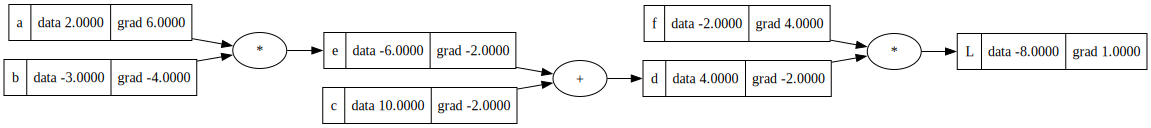

In [61]:
draw_dot(L)

This completes our back-propagation of the gradients.

### Optimization

In order to optimize, we update the variables using the gradient.

Lets say for now that our optimization goal is to increase final output (L in our case), i.e., we want L to go up

Lets nudge each independent variable in the DAG in the direction of the gradient... we expect
gradient of L to down up because of this.  If we wanted to lower L, we could go in the opposite direction of the gradient.

Lets start with the leaf nodes (a, b, c, f) that are variable and that we have control over.

In [65]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

Now we do the forward pass by calculating the rest of the computed nodes all the way to L  (remember the previous value we had for L was 8.0)

In [63]:
# now do a forward pass
e = a * b
d = e + c
L = d * f

L

Value(data=-7.286496, grad=0.0)

So note that L did increase or go up from -8.0 to -7.3

### Back-Propagation through a Neuron

Now lets do an example of back-propagation, using a simple Neuron.  

Recall the following from our lesson [Introduction to Neural Networks](/nn-intro.pynb)


![Mathematical model of a Neuron](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

- Inputs $x_i$: Represented by the arrows entering the neuron.
- Weights $w_i$: Associated with each input, indicating the strength of the connection.
- Summation $Σ$: The neuron sums all the weighted inputs.
- Activation Function $f$: Applied to the weighted sum to produce the output.

INPUT: Neuron has multiple synapses or inputs (x).  Each neuron has a weight (w)

VALUE: Value of a neuron is sum(w1*x1 + w2*x2 + ... + wn*xn) + b (where b is a bias)

OUTPUT: output is f(VALUE) - where f is a squashing function like a tanh

Squashing function takes neurons value as input and squashes it to a value between -1 and 1.

So if value output by squashing function is > 0 then the neuron fires.. otherwise it does not

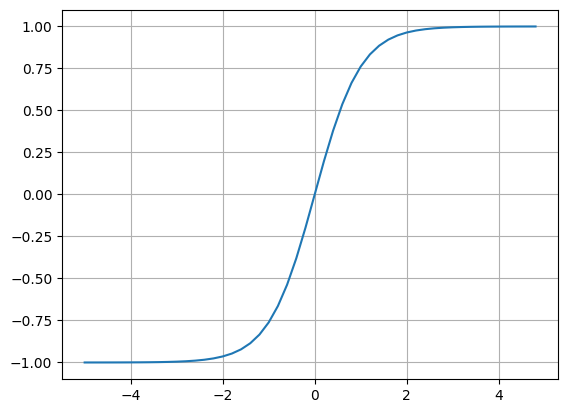

In [66]:
# Example of tanh squashing function
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

So we are going for a simple Neuron with two inputs

$$
y = w_1 x_1 + w_2 x_2 + \dots + b
$$

In [67]:
# Simple example
# inputs are x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights are w1 and w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')  # we randomly chose this (or Andrej did!)
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
# value of neuron
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# output of neuron (taking it through an activation function)
o = n.tanh(); o.label='output'

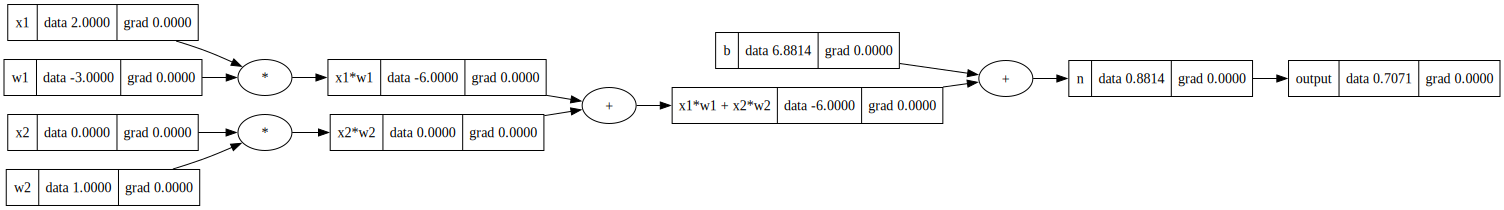

In [68]:
draw_dot(o)

In [69]:
o.grad = 1.0

In [70]:
# o = tanh(n)
# do/dn = 1 - (tanh(n))**2 = 1 - (o)**2
1 - (o.data)**2
# do/dn = 0.5

0.4999999999999999

In [71]:
n.grad = 0.
# since n is connected to x1w1x2w2 and b via a plus node
x1w1x2w2.grad = 0.5
b.grad = 0.5
# similarily
x1w1.grad = 0.5
x2w2.grad = 0.5
# since x1w1 is connected to x1 and w1 via multiplication
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
# since x2w2 is connected to x2 and w2 via multiplication
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
